In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh_tridiagonal, eigh_tridiagonal

## Time Independent Shrodinger Equation (In one Dimension)

In [2]:
# define parameters
N = 2000
xi, xf = -5e-9, 5e-9
hbar = 1.05457182e-34
me = 9.109e-31

In [37]:
# Arbitrary potentials

# Quantum Harmonic oacillaot 
def V(t):
    me = 9.109e-31
    w = 1/np.sqrt(me)
    return 1/2*me*w**2 * t**2


def Solve_TimeInd(V, xi, xf, N):
    dx = (xf-xi)/N
    x = np.linspace(xi, xf, N+1)
    # main diagonal = Kinetic (laplacian) diagonal + Potential "diagonal operator"
    D2 = -2*np.ones(N + 1)
    diag = (-hbar**2)/(2*me*dx**2)*D2 + V(x)
    # off diagonals (only Kinertic Energy contribution)
    off_diag = np.ones(N)*(-hbar**2)/(2*me*dx**2)
    
    # creat sparse matrix to optimize space usage
    return eigh_tridiagonal(diag, off_diag)
eig_val,eig_vectors = Solve_TimeInd(V, xi, xf, N)

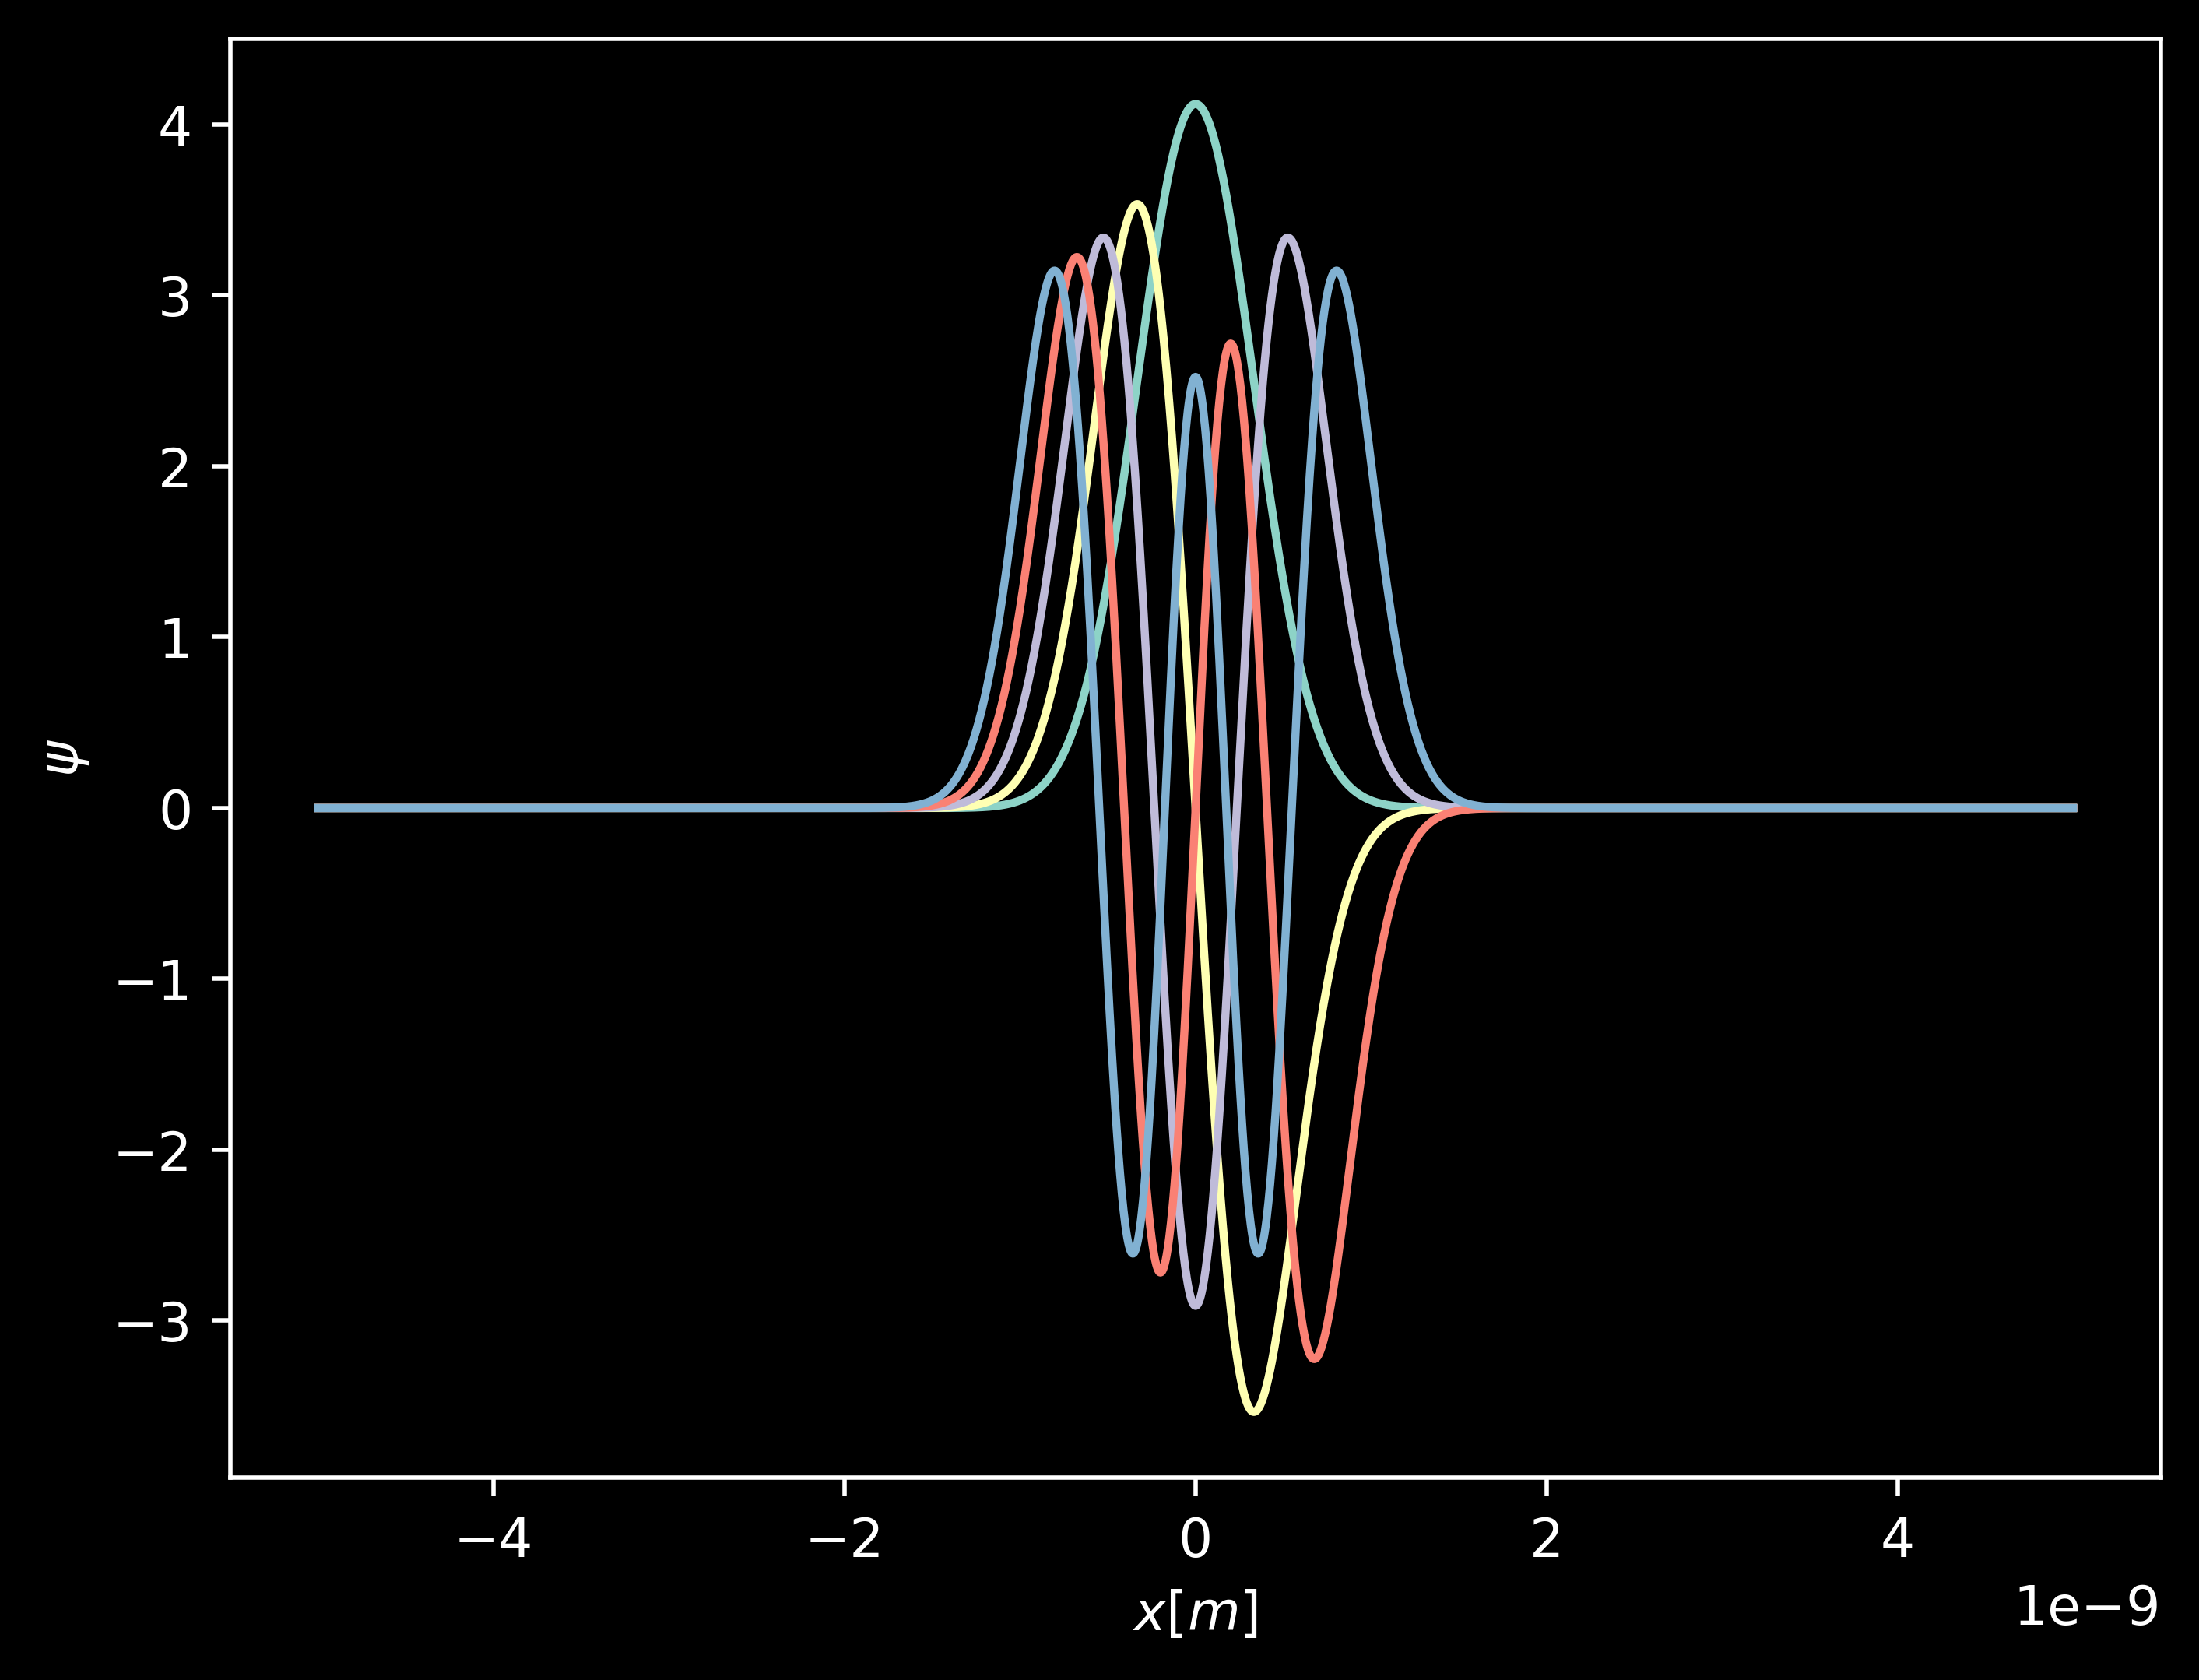

In [12]:
# Plot eigenstates for harmonic oscillator 
x = np.linspace(xi, xf, N+1)
plt.figure(dpi = 500)
plt.plot(x, eig_vectors[:, 0:51].T[0]*np.sqrt(N))
# multiply by \sqrt{N} since numpy normalize the state rather than the probability |\psi|^2
plt.plot(x, eig_vectors.T[1]*np.sqrt(N))
plt.plot(x, eig_vectors.T[2]*np.sqrt(N))
plt.plot(x, eig_vectors.T[3]*np.sqrt(N))
plt.plot(x, eig_vectors.T[4]*np.sqrt(N))
plt.xlabel(r"$x[m]$")
plt.ylabel(r"$\psi$")
plt.show()

In [9]:
# energies = (n+1/2)\hbar\omega = (n+1/2)\hbar\frac{1}{\sqrt{m_e}}
eig_val[0:10]/(hbar*1/np.sqrt(me))
# should be [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, ...]

array([0.49999293, 1.49996465, 2.49990808, 3.49982323, 4.49971009,
       5.49956867, 6.49939895, 7.49920095, 8.49897466, 9.49872007])

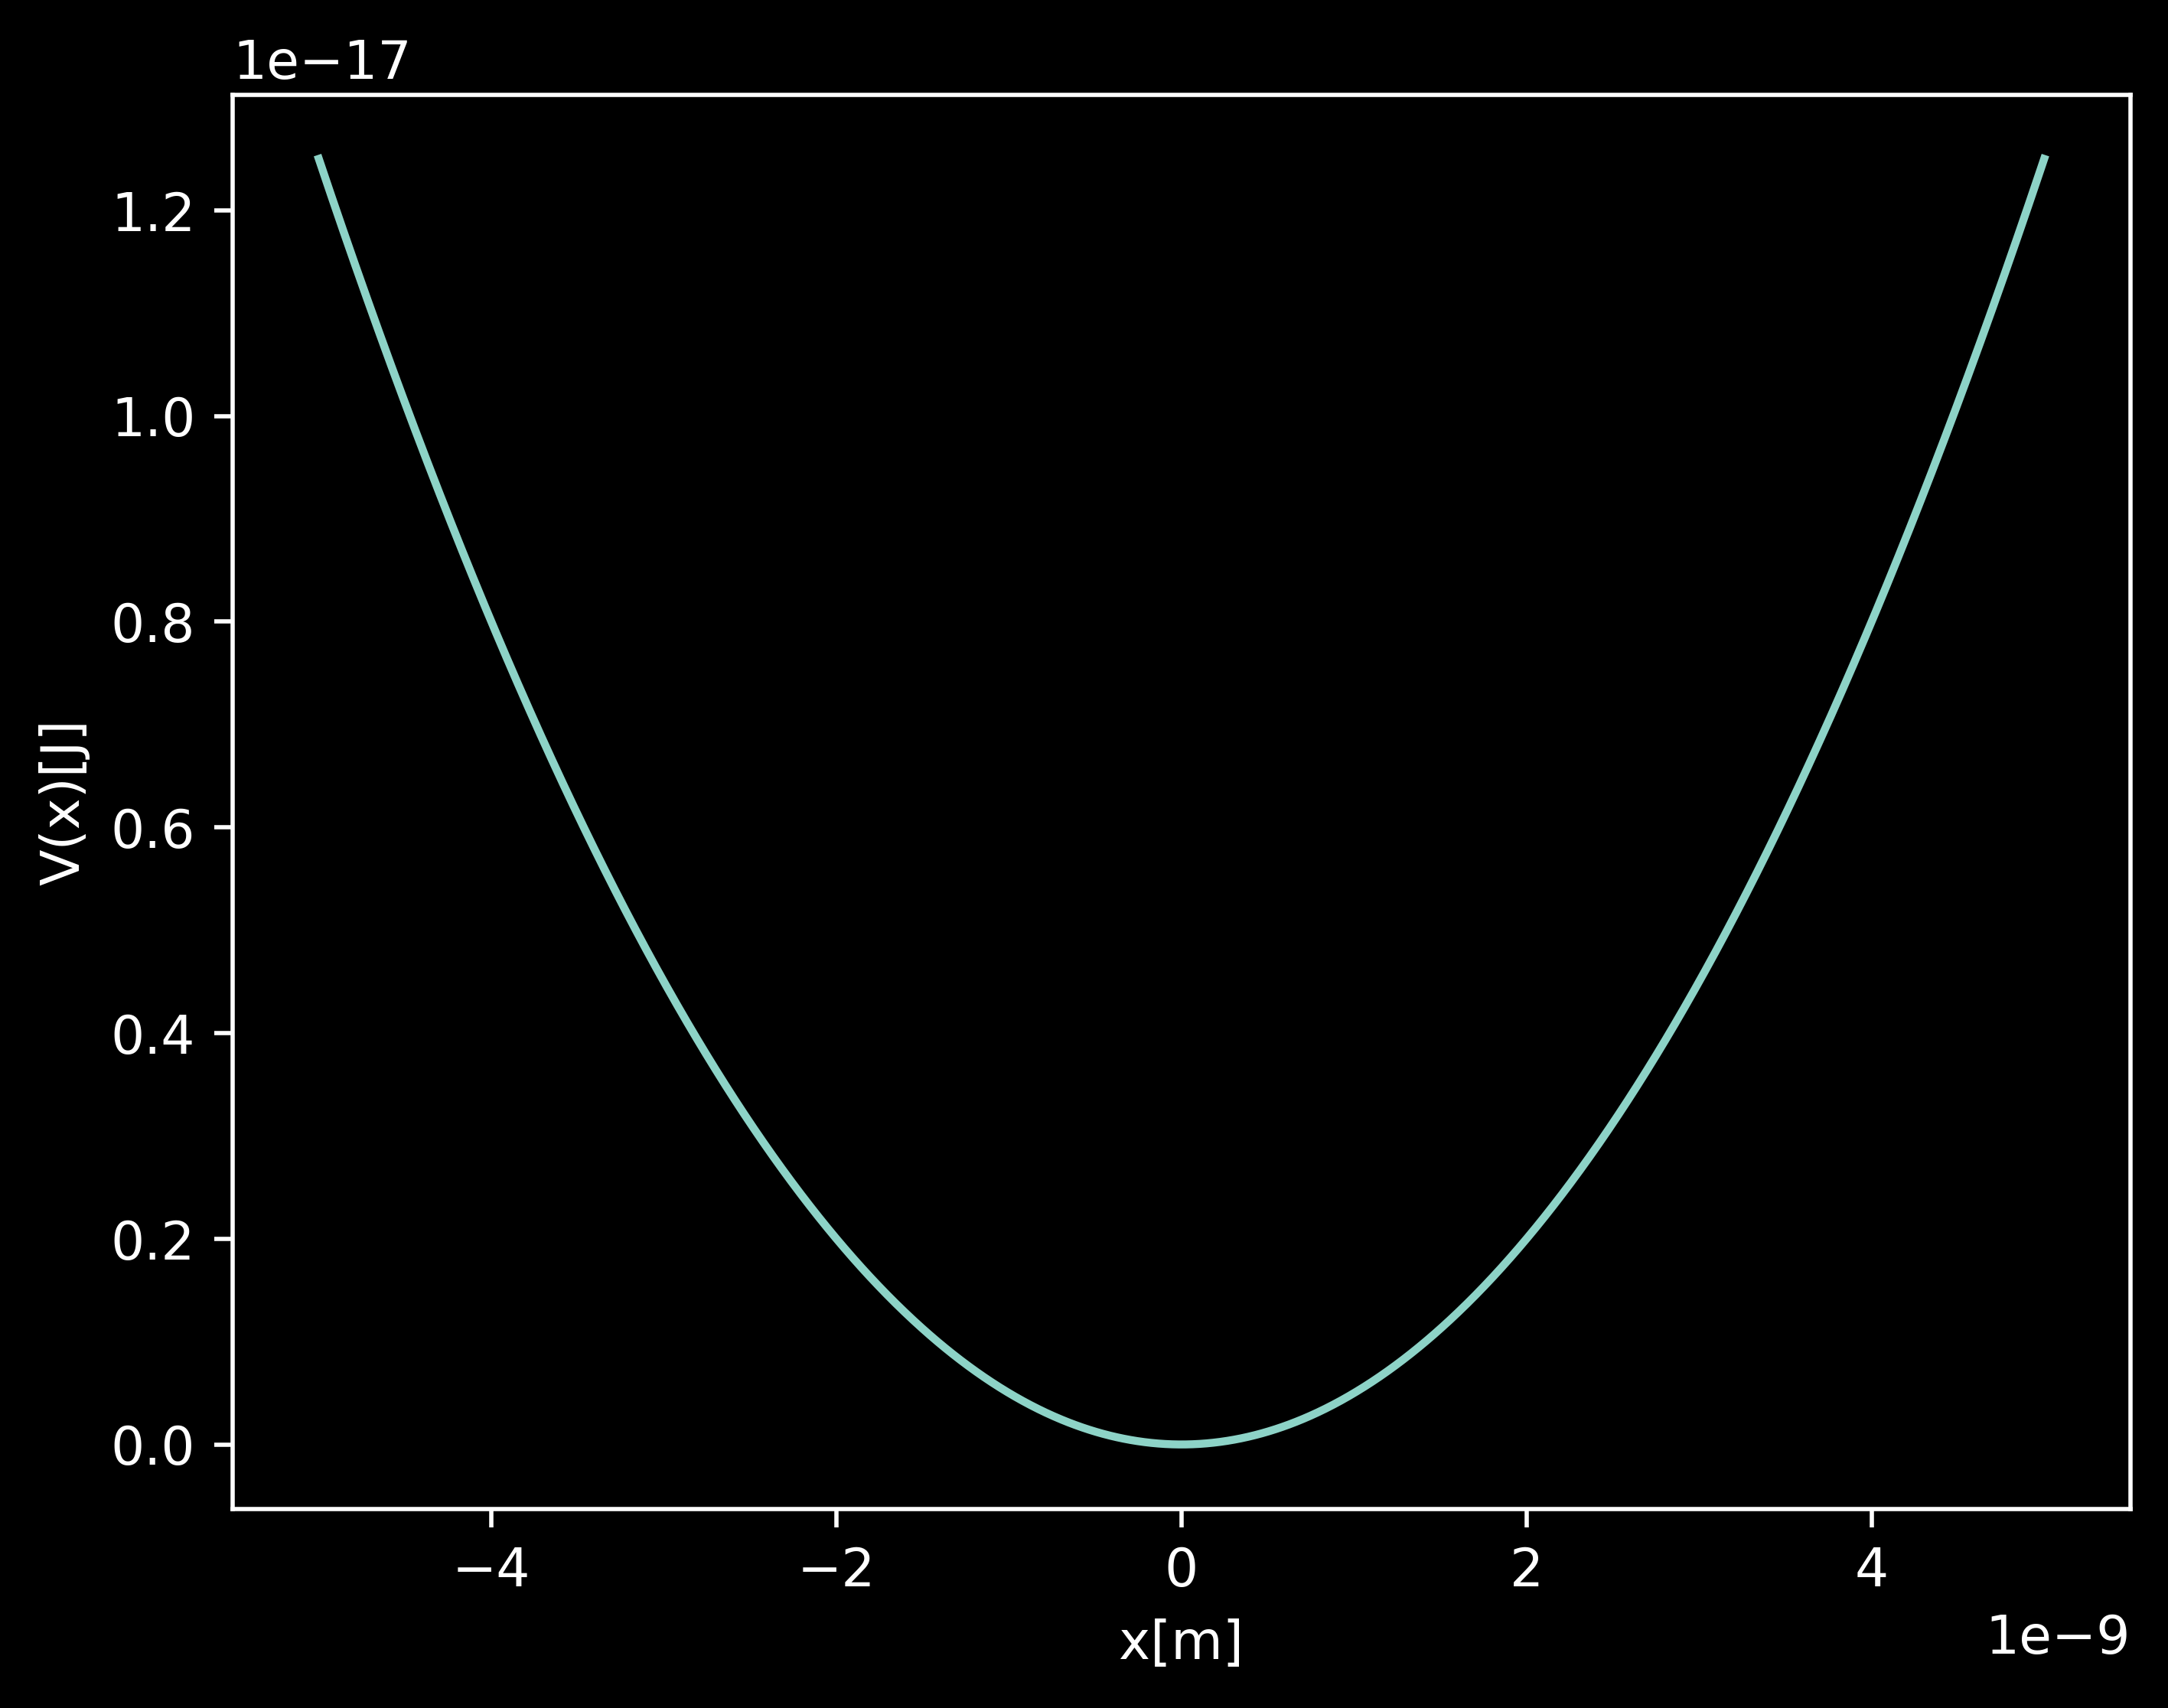

In [10]:
plt.figure(dpi = 500)
plt.plot(x, V(x))
plt.xlabel("x[m]")
plt.ylabel("V(x)[J]")
# plt.savefig('C:\\Users\\ss\\Pictures\\Potintial.png', facecolor = 'w', dpi = 600, bbox_inches = "tight")
plt.show()

## Time dependence

In [27]:
# initial states
# gaussian
psi0 = lambda x: np.exp(-(np.sqrt(me)*(x-1.5e-9)**2)/(2*hbar))

# moving gaussian packet
# psi0 = lambda x: np.exp(-(np.sqrt(me)*(x)**2)/(2*hbar))*np.exp(-1e11j*x)

# dirac delta
# def psi0(x):
#     ans = 0*x
#     ans[(x > -2.5e-10)*(x< 2.5e-10)] = 1e9
#     return ans

xt = np.linspace(xi, xf, N+1)
# normalise initial state
PSI0 = psi0(xt)/np.linalg.norm(psi0(xt))

# number of used eigenvectors
m = 400

# solve for \psi(x, t)
def psi_t_2(t):
    psi_0 = PSI0
    return eig_vectors[:,0:m+1]@np.diag(np.exp(-1j*eig_val*t/hbar))[0:m+1, 0:m+1]@eig_vectors[:, 0:m+1].T@psi_0

np.float64(1.0000000000000016)

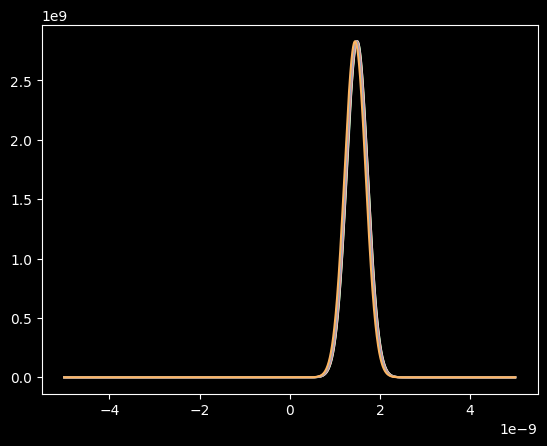

In [28]:
dx = (xf-xi)/N
plt.plot(x, np.absolute(psi_t_2(0))**2*N/6e-9)
plt.plot(x, np.absolute(psi_t_2(50e-18))**2*N/6e-9)
plt.plot(x, np.absolute(psi_t_2(100e-18))**2*N/6e-9)
plt.plot(x, np.absolute(psi_t_2(150e-18))**2*N/6e-9)
plt.plot(x, np.absolute(psi_t_2(200e-18))**2*N/6e-9)
plt.plot(x, np.absolute(psi_t_2(250e-18))**2*N/6e-9)
np.sum(np.absolute(psi_t_2(300e-18))**2/dx*dx)

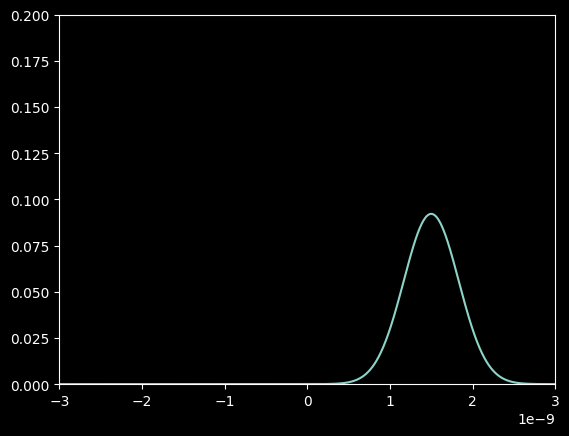

In [29]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
fig2, ax2 = plt.subplots(1,1)
ln2, = plt.plot([], [])
ax2.set_xlim(-3e-9,3e-9)
ax2.set_ylim(-0, 0.2)

def animate2(i):
    ln2.set_data(x, np.absolute(psi_t_2(i*1e-17)))#enter the function)

ani = animation.FuncAnimation(fig2, animate2, frames=100, interval=40)
ani.save("oscillating_electron.gif",writer='pillow',fps=50,dpi=100)

Calculating the expected position as a function of time

In [30]:
t = np.linspace(0, 8e-15, 400)
Max_pos = 0*t
for k in range(400):
    Max_pos[k] = x[np.absolute(psi_t_2(t[k])) == np.max(np.absolute(psi_t_2(t[k])))]

C:\Users\SS\AppData\Local\Temp\ipykernel_12516\1003539323.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Max_pos[k] = x[np.absolute(psi_t_2(t[k])) == np.max(np.absolute(psi_t_2(t[k])))]


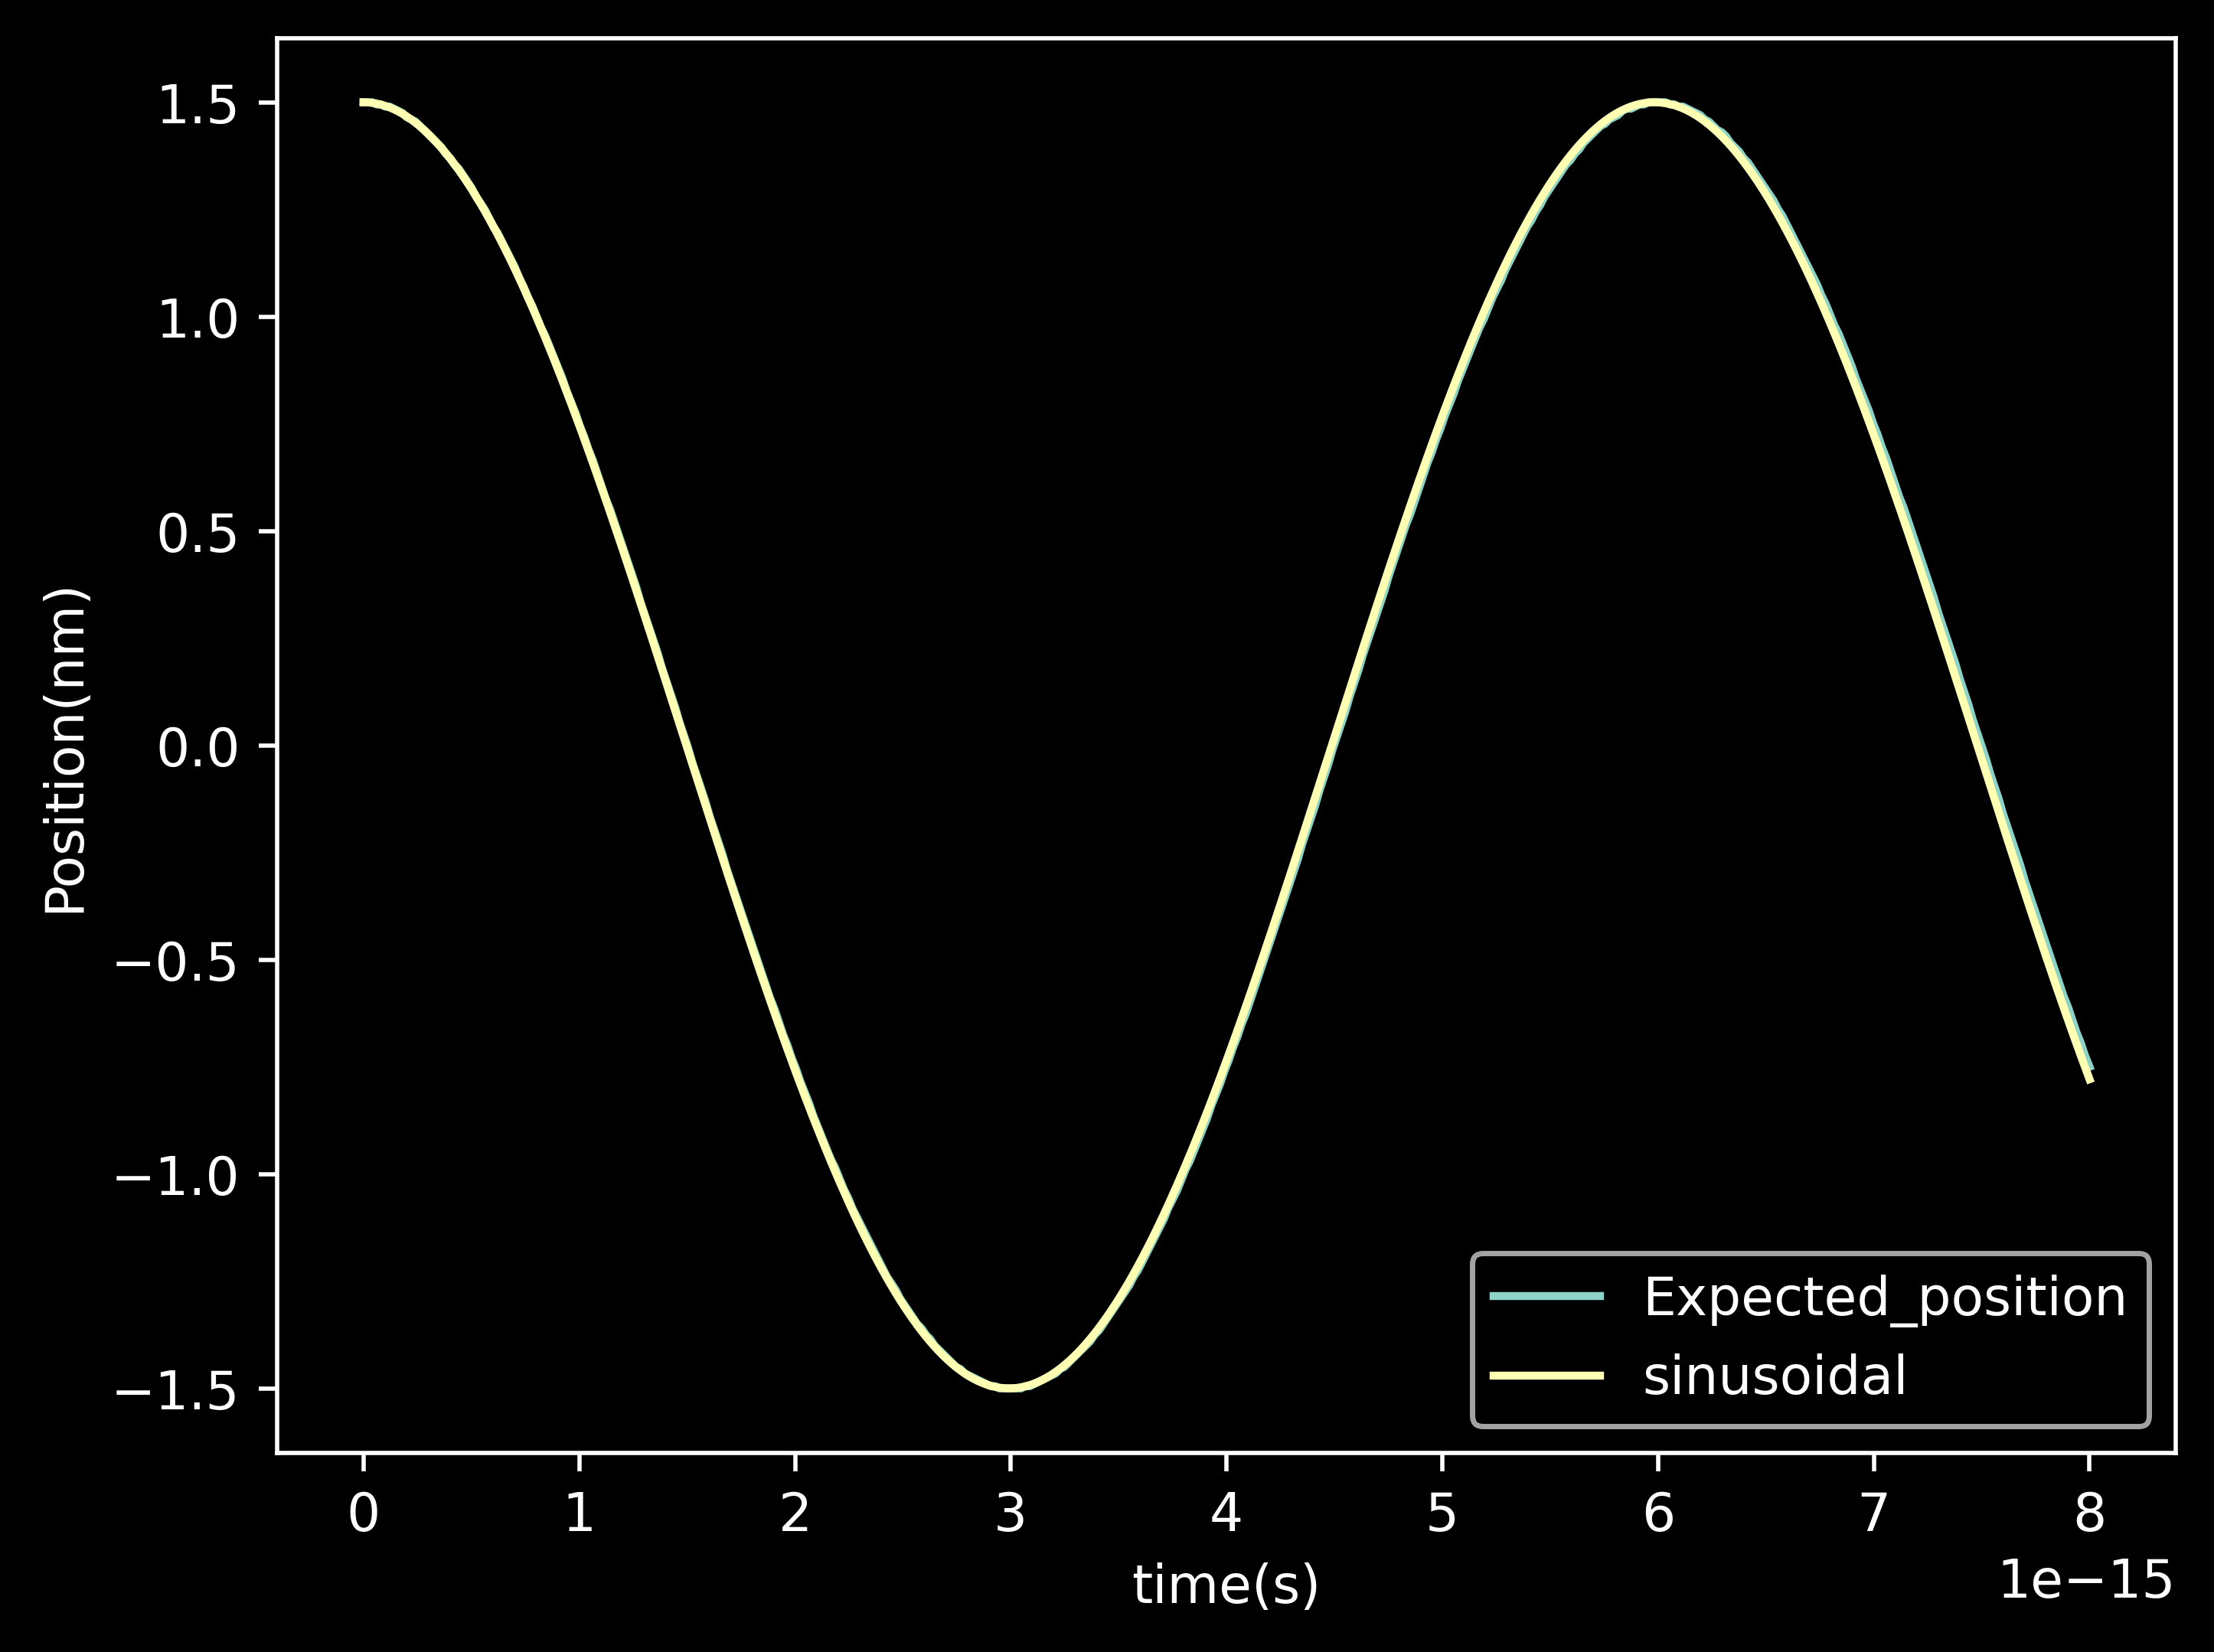

In [31]:
plt.figure(dpi = 500)
plt.xlabel("time(s)")
plt.ylabel("Position(nm)")
plt.plot(t, 10**9*Max_pos, label = "Expected_position")
plt.plot(t, 1.5*np.cos(1.05e15*t), label = "sinusoidal")
plt.legend()
plt.savefig('C:\\Users\\ss\\Pictures\\Electroninvalleyposition.png', facecolor = 'w', dpi = 600, bbox_inches = "tight")

## Infinite Square Well

In [38]:
Vsq = lambda x: 0*x
IS_en, IS_states = Solve_TimeInd(Vsq, xi, xf, N)

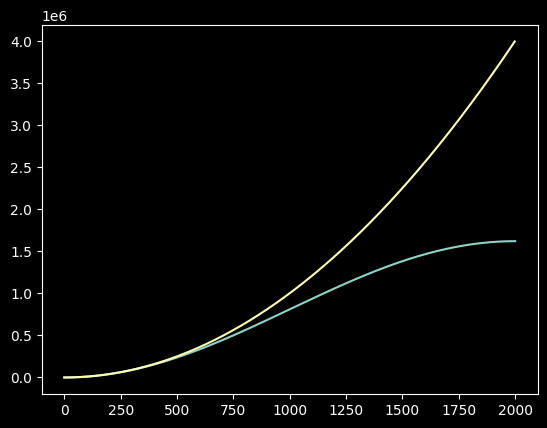

In [42]:
plt.plot(2*me*(xf-xi)**2*IS_en/(np.pi**2 * hbar**2))
plt.plot([n*n for n in range(1, 2000)])
plt.show()

In [87]:
# dispersion demonstration
psi0_sq = lambda x: np.exp(-(np.sqrt(me)*(x)**2)/(2*hbar))
psi0_sq_vel = lambda x: np.exp(-(np.sqrt(me)*(x)**2)/(2*hbar))*np.exp(-1e10j*x)  #given velocity
xtsq = np.linspace(xi, xf, N+1)
PSI0sq = psi0_sq(xt)/np.linalg.norm(psi0_sq(xt))
PSI0sq_vel = psi0_sq_vel(xt)/np.linalg.norm(psi0_sq_vel(xt))

# use m = 100 (still within the close states <~ 250)
m = 100
def psi_t_sq(t, psi_0):
    return IS_states[:,0:m+1]@np.diag(np.exp(-1j*IS_en*t/hbar))[0:m+1, 0:m+1]@IS_states[:, 0:m+1].T@psi_0

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SS\AppData\Local\Temp\ipykernel_12516\1099018438.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$real(\psi(x))$")


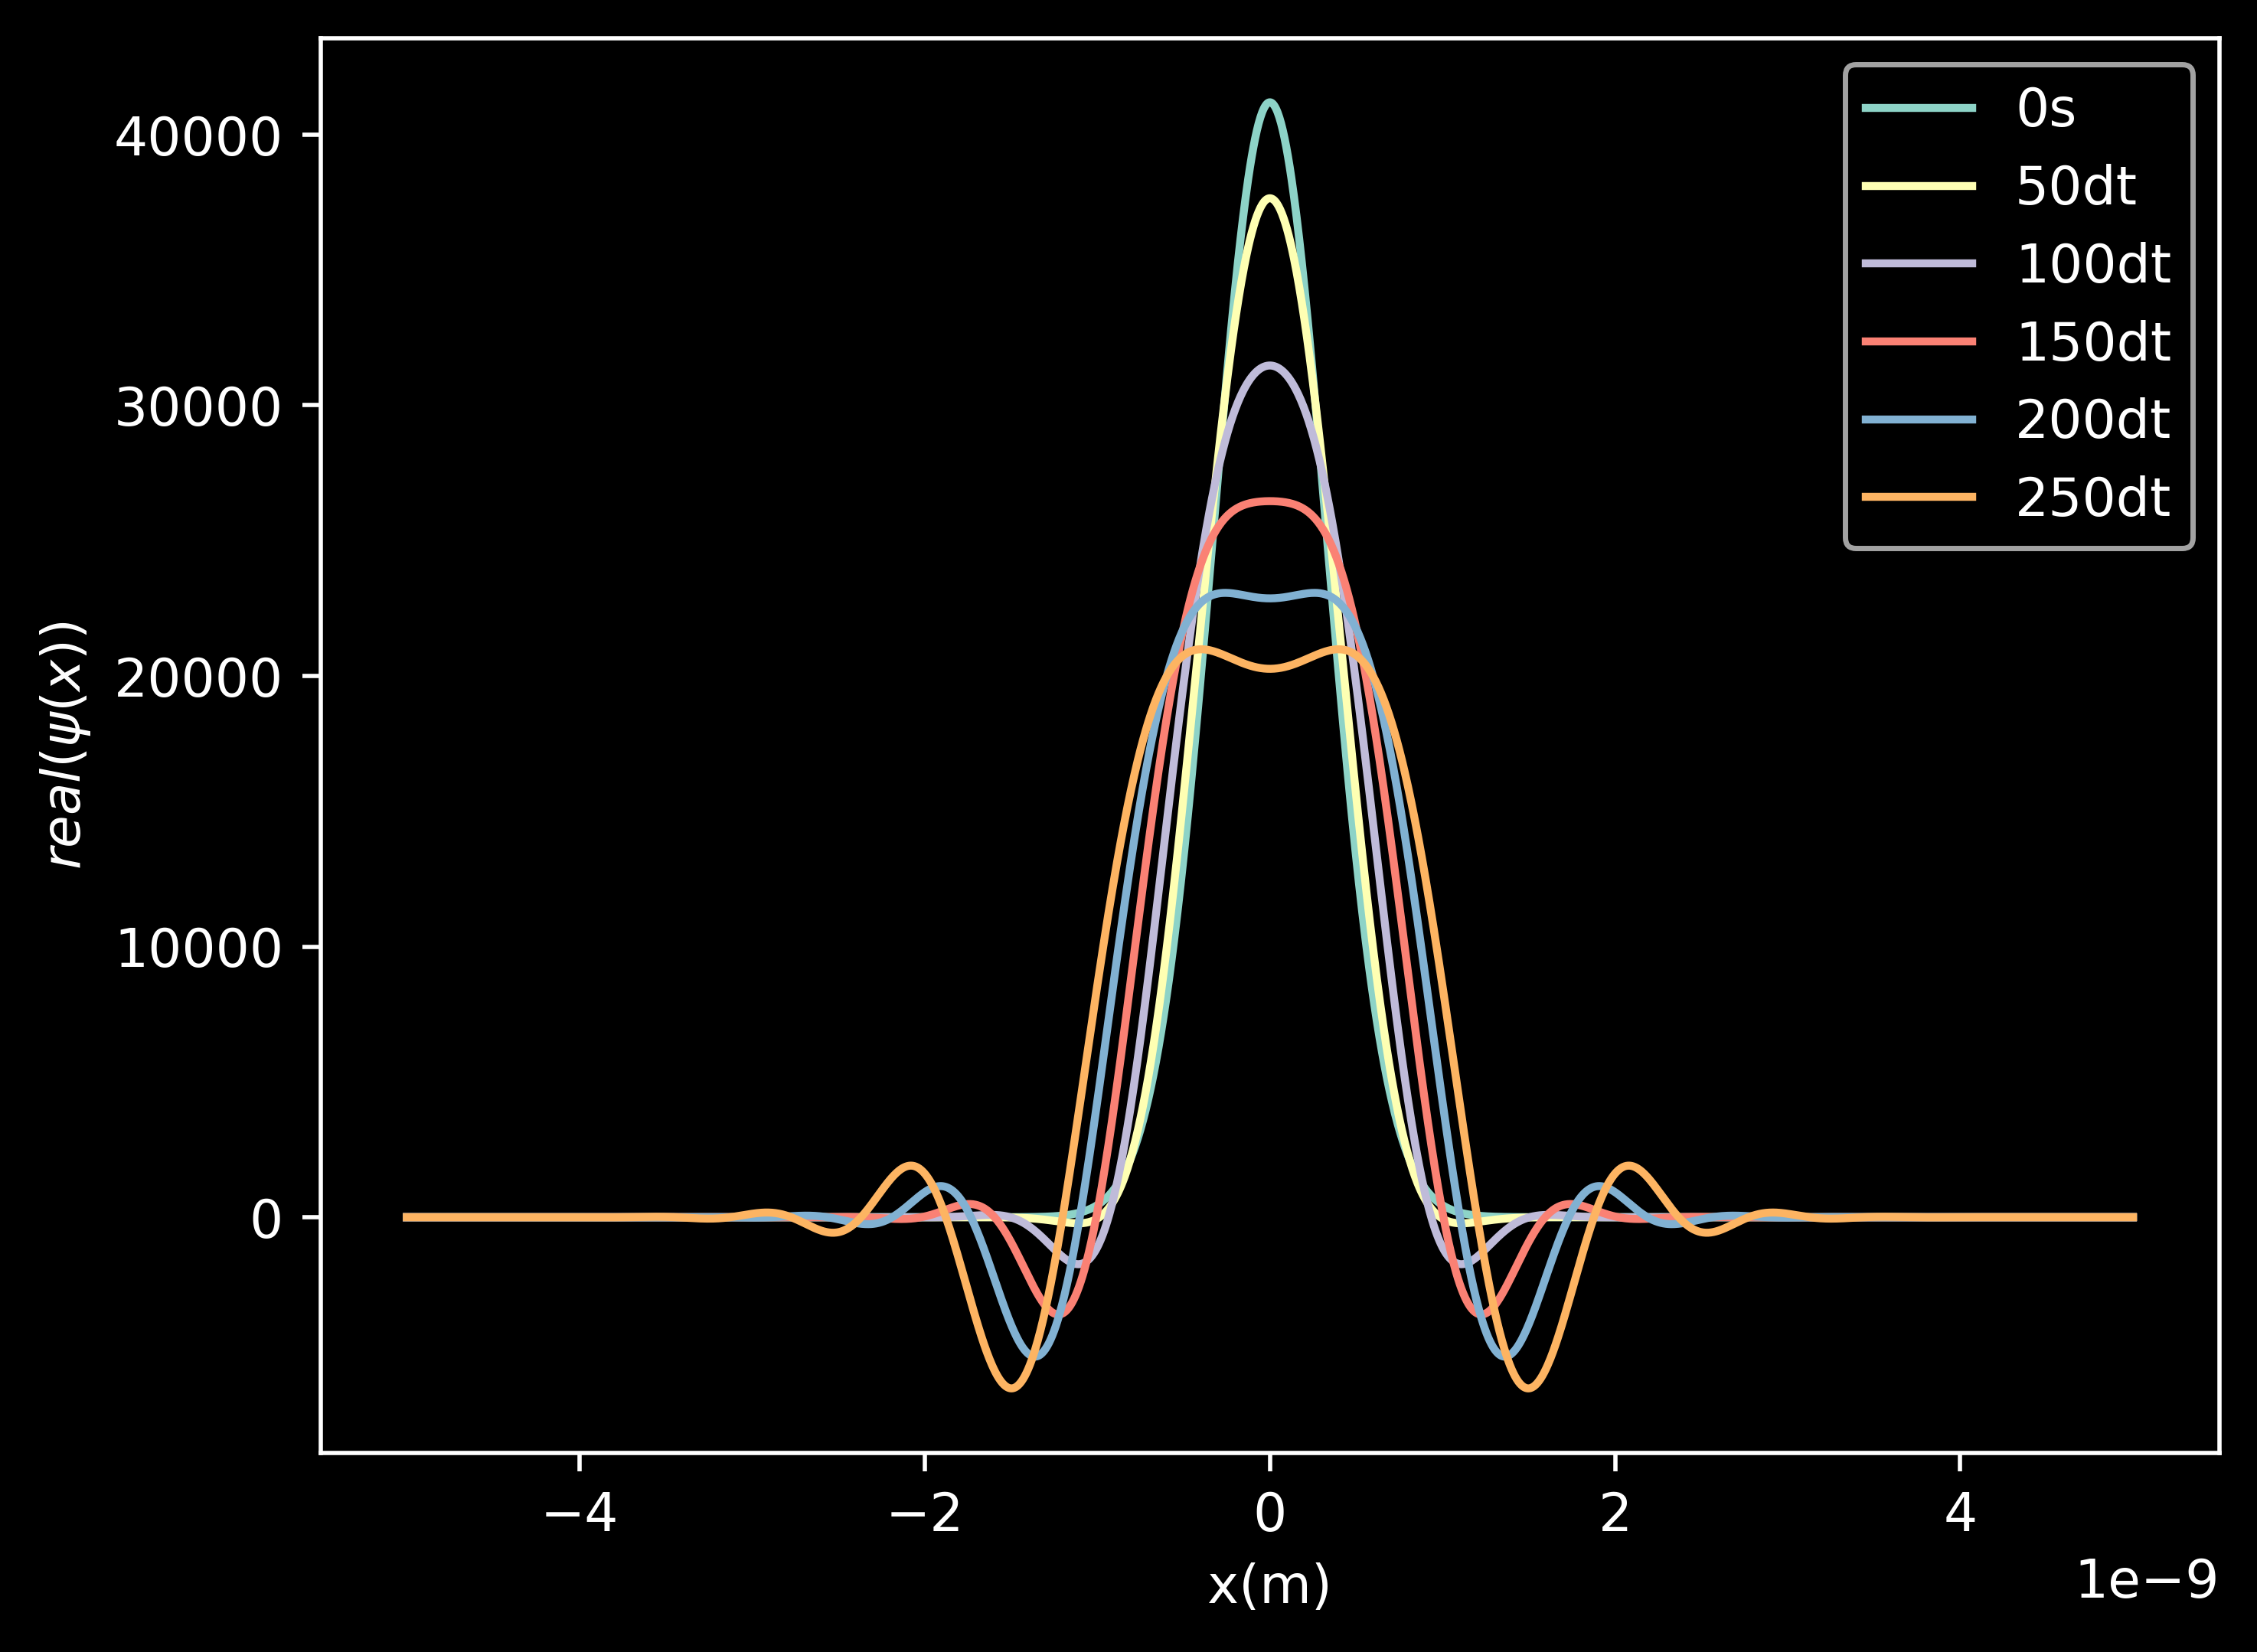

In [54]:
dx = (xf-xi)/N
plt.figure(dpi = 500)
plt.xlabel("x(m)")
plt.ylabel("$real(\psi(x))$")
plt.plot(x, np.real(psi_t_sq(0, PSI0sq))/np.sqrt(dx), label = "0s")
plt.plot(x, np.real(psi_t_sq(50e-17, PSI0sq))/np.sqrt(dx), label = "50dt")
plt.plot(x, np.real(psi_t_sq(100e-17, PSI0sq))/np.sqrt(dx), label = "100dt")
plt.plot(x, np.real(psi_t_sq(150e-17, PSI0sq))/np.sqrt(dx), label = "150dt")
plt.plot(x, np.real(psi_t_sq(200e-17, PSI0sq))/np.sqrt(dx), label = "200dt")
plt.plot(x, np.real(psi_t_sq(250e-17, PSI0sq))/np.sqrt(dx), label = "250dt")
plt.legend()
plt.savefig('dispersion.png', dpi = 600, bbox_inches = "tight")
plt.show()

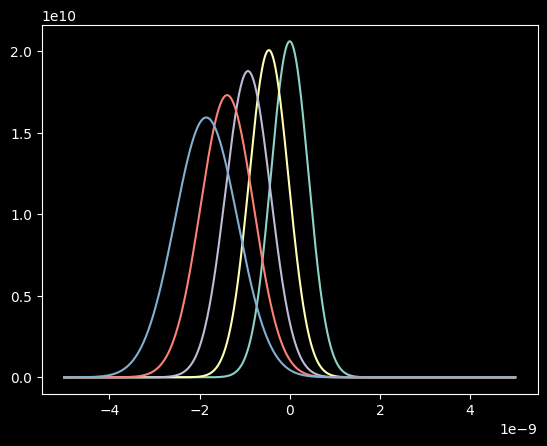

In [95]:
plt.plot(x, np.absolute(psi_t_sq(0, PSI0sq_vel))/dx, label = "0s")
plt.plot(x, np.absolute(psi_t_sq(50e-17, PSI0sq_vel))/dx, label = "50dt")
plt.plot(x, np.absolute(psi_t_sq(100e-17, PSI0sq_vel))/dx, label = "100dt")
plt.plot(x, np.absolute(psi_t_sq(150e-17, PSI0sq_vel))/dx, label = "150dt")
plt.plot(x, np.absolute(psi_t_sq(200e-17, PSI0sq_vel))/dx, label = "200dt")

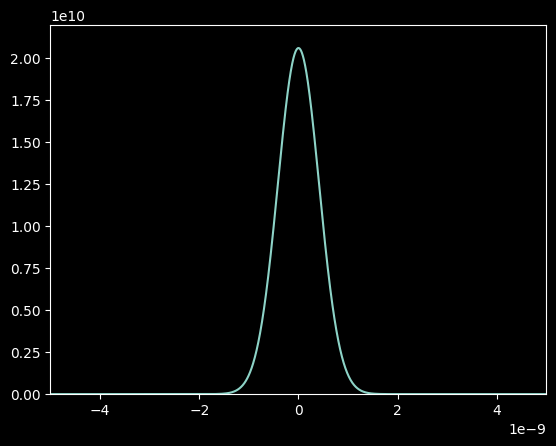

In [98]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
fig2, ax2 = plt.subplots(1,1)
ln2, = plt.plot([], [])
ax2.set_xlim(-5e-9,5e-9)
ax2.set_ylim(0, 2.2e10)

def animate2(i):
    ln2.set_data(x, np.absolute(psi_t_sq(i*3e-17, PSI0sq_vel)/dx))#enter the function
    ln2.set_label(fr"$t = {i*3e-17*1e12} fs$")

ani = animation.FuncAnimation(fig2, animate2, frames=400, interval=40)
ani.save("dispersion.gif",writer='pillow',fps=50,dpi=100)

## Expected values of Energy

In [56]:
def Eexp(psi, V_prime, xi, xf, N):
    hbar = 1.05457182e-34
    me = 9.109e-31
    dx = (xf-xi)/N
    x = np.linspace(xi, xf, N+1)
    D2 = -2*np.ones(N + 1)
    diag = (-hbar**2)/(2*me*dx**2)*D2 + V_prime(x)
    off_diag = np.ones(N)*(-hbar**2)/(2*me*dx**2)
    H = np.diag(diag, k=0) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    return np.dot(np.conj(psi), H@psi)#/np.dot(np.conj(psi), psi)

## Tunneling

In [57]:
xti, xtf = -4e-9, 4e-9
xt = np.linspace(xti, xtf, N+1)
V0 = 2.75e-16
def V_tun(x):
    V = np.zeros(len(x))
    V[np.logical_and(x>0, x<5e-12)] = V0
    return V
eig_valt,eig_vectorst = Solve_TimeInd(V_tun, xti, xtf, N)

In [58]:
eig_valt

array([3.73490217e-21, 3.76047796e-21, 1.49395788e-20, ...,
       1.52612659e-15, 1.52612661e-15, 1.57417151e-15])

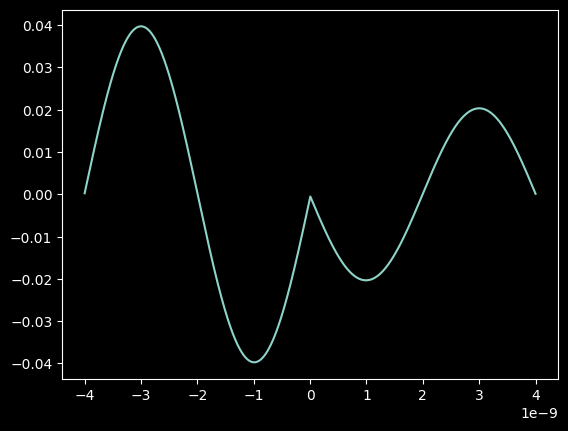

In [59]:
plt.plot(xt, eig_vectorst.T[2])

In [60]:
psi0tun = lambda x: np.exp(-(np.sqrt(me)*(x-3e-9)**2)/(1*hbar))*np.exp(-2e10j*x)
xt = np.linspace(xti, xtf, N+1)
PSI0tun = psi0tun(xt)/np.linalg.norm(psi0tun(xt))

m = 100
def psi_t_tunneling(t):
    psi_0 = PSI0tun
    return eig_vectorst[:,0:m+1]@np.diag(np.exp(-1j*eig_valt*t/hbar))[0:m+1, 0:m+1]@eig_vectorst[:, 0:m+1].T@psi_0

In [61]:
Energy = Eexp(PSI0tun, V_tun, xti, xtf, N)
Energy

np.complex128(2.4955751995669053e-18-8.4489825143787e-34j)

In [67]:
# the barrier is higher than the expected energy
V0/np.real(Energy)

np.float64(110.1950364179468)

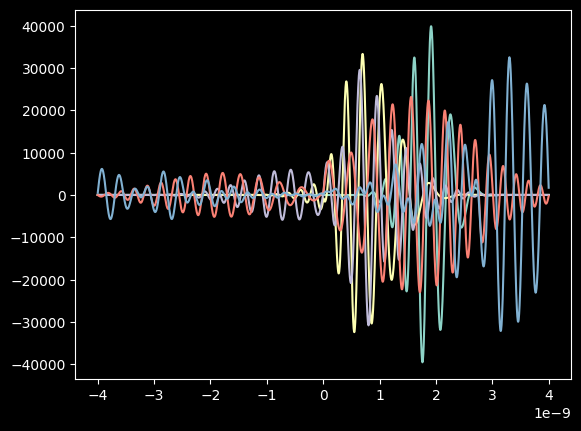

In [63]:
dx = (xtf-xti)/N
plt.plot(xt, np.real(psi_t_tunneling(50e-17))/np.sqrt(dx))
plt.plot(xt, np.real(psi_t_tunneling(100e-17))/np.sqrt(dx))
plt.plot(xt, np.real(psi_t_tunneling(150e-17))/np.sqrt(dx))
plt.plot(xt, np.real(psi_t_tunneling(200e-17))/np.sqrt(dx))
plt.plot(xt, np.real(psi_t_tunneling(300e-17))/np.sqrt(dx))

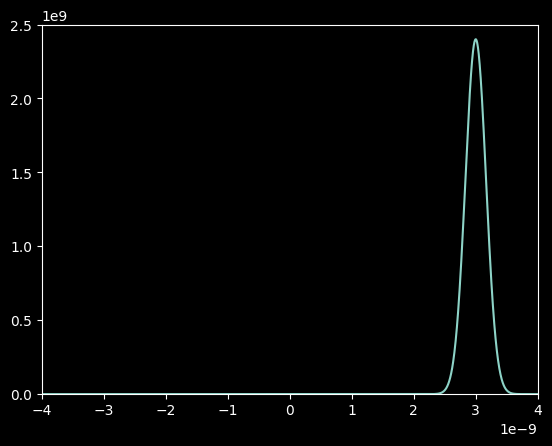

In [64]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
fig2, ax2 = plt.subplots(1,1)
ln2, = plt.plot([], [])
ax2.set_xlim(xti,xtf)
ax2.set_ylim(0, 2.5e9)

def animate2(i):
    
    ln2.set_data(xt, np.absolute(psi_t_tunneling(i*2e-17))**2/dx)#enter the function)

ani = animation.FuncAnimation(fig2, animate2, frames=100, interval=40)
ani.save("tunneling_prob_test.gif",writer='pillow',fps=50,dpi=100)

In [66]:
# max transmitted amplitude
max_transmitted = 0
for i in range(2):
    max_transmitted = max(max_transmitted, np.dot(psi_t_tunneling(i*250e-17)[xt<0], np.conjugate(psi_t_tunneling(i*250e-17)[xt<0])))
max_transmitted

np.complex128(0.047665568449615836+0j)